In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
plt.rcParams.update({'font.size': 11})

In [2]:
df_c01 = pd.read_excel('results/results_c01.xlsx') # C = 0.1
df_c01['C'] = 0.1

df_c05 = pd.read_excel('results/results_c05.xlsx') # C = 0.5
df_c05['C'] = 0.5

df_1d = pd.read_excel('results/results_1d.xlsx') # C = 1.0
df_5d = pd.read_excel('results/results_5d.xlsx') # C = 1.0
df_10d = pd.read_excel('results/results_10d.xlsx') # C = 1.0
df_15d = pd.read_excel('results/results_15d.xlsx') # C = 1.0
df_20d = pd.read_excel('results/results_20d.xlsx') # C = 1.0

list_df_c10 = [df_1d, df_5d, df_10d, df_15d, df_20d]

df_c10 = pd.concat(list_df_c10)
df_c10['C'] = 1

df_all = pd.concat([df_c01,df_c05,df_c10])

df_all = df_all.drop(columns=['Unnamed: 0'])
df_all

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return
0,1,0.1,30,20,0.612,0.533,41.4,10.2
1,2,0.1,30,20,0.600,0.532,36.7,8.6
2,3,0.1,30,20,0.604,0.512,38.2,-2.9
3,4,0.1,30,20,0.620,0.504,45.6,-2.1
4,5,0.1,30,20,0.603,0.515,39.4,2.2
...,...,...,...,...,...,...,...,...
445,26,1.0,300,20,0.672,0.565,67.6,7.5
446,27,1.0,300,20,0.657,0.552,60.5,10.9
447,28,1.0,300,20,0.665,0.560,64.2,13.3
448,29,1.0,300,20,0.665,0.577,70.0,18.7


In [3]:
df_all['Generalization'] = df_all.apply(lambda x: abs(x['Training Accuracy']-x['Testing Accuracy'])+1, axis=1)
#df_all['Model Performance'] = df_all.apply(lambda x: (-x['Training Accuracy']*0.1)+x['Generalization'], axis=1)
df_all

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
0,1,0.1,30,20,0.612,0.533,41.4,10.2,1.079
1,2,0.1,30,20,0.600,0.532,36.7,8.6,1.068
2,3,0.1,30,20,0.604,0.512,38.2,-2.9,1.092
3,4,0.1,30,20,0.620,0.504,45.6,-2.1,1.116
4,5,0.1,30,20,0.603,0.515,39.4,2.2,1.088
...,...,...,...,...,...,...,...,...,...
445,26,1.0,300,20,0.672,0.565,67.6,7.5,1.107
446,27,1.0,300,20,0.657,0.552,60.5,10.9,1.105
447,28,1.0,300,20,0.665,0.560,64.2,13.3,1.105
448,29,1.0,300,20,0.665,0.577,70.0,18.7,1.088


In [4]:
df_all.groupby(by=['C']).mean()

,LAG,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
C,,,,,,,,
0.1,15.5,154.117647,10.2,0.573095,0.548904,23.105216,13.684667,1.028109
0.5,15.5,154.117647,10.2,0.632385,0.537344,50.287765,5.371922,1.095042
1.0,15.5,124.666667,10.2,0.670667,0.527505,69.842400,2.396311,1.143162


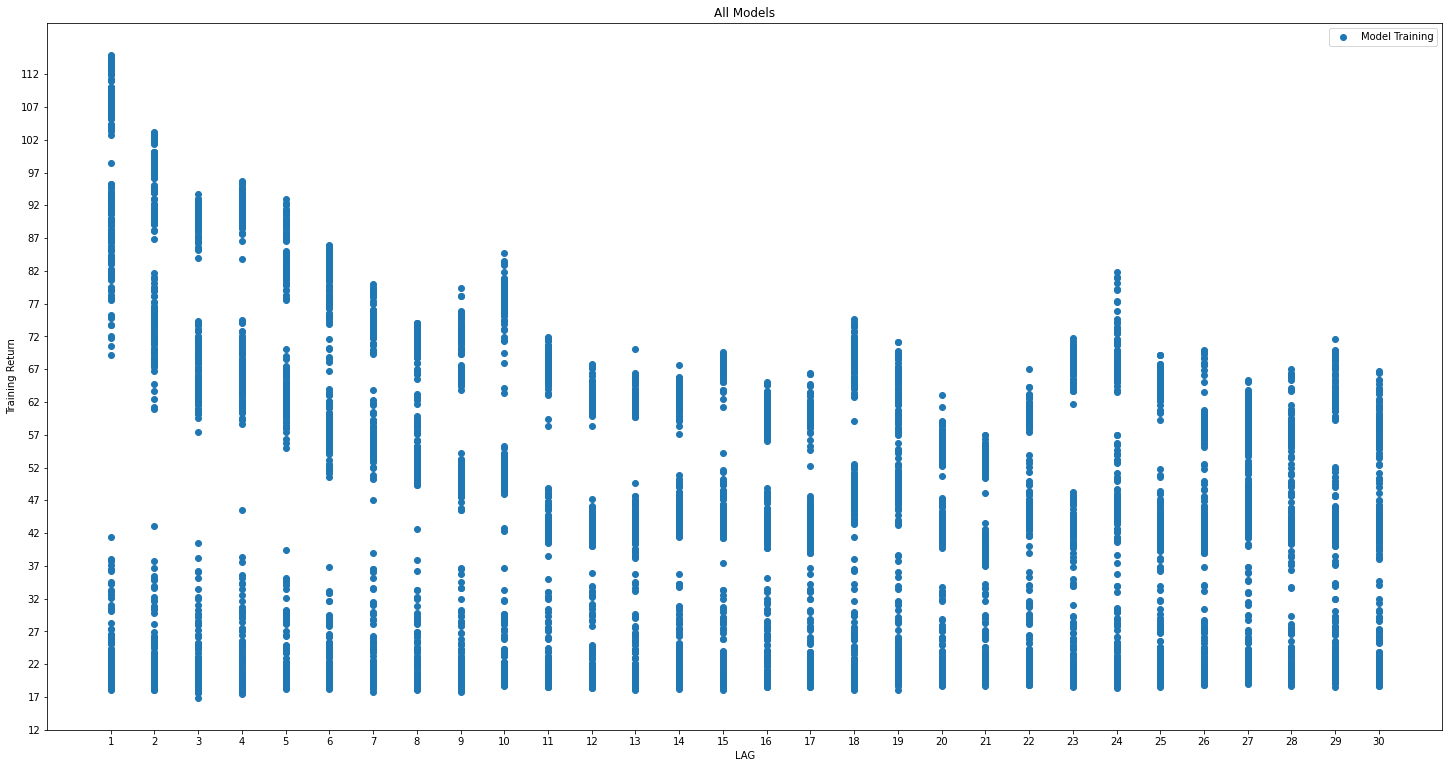

In [5]:
plt.figure(figsize=(25,13))
plt.xticks(np.arange(min(df_all['LAG']), max(df_all['LAG'])+1, 1))
plt.yticks(np.arange(-8, max(df_all['Training Return']), 5))
plt.scatter(df_all['LAG'],df_all['Training Return'], label="Model Training")
plt.xlabel('LAG')
plt.ylabel('Training Return')

plt.legend()
plt.title("All Models")
plt.show()

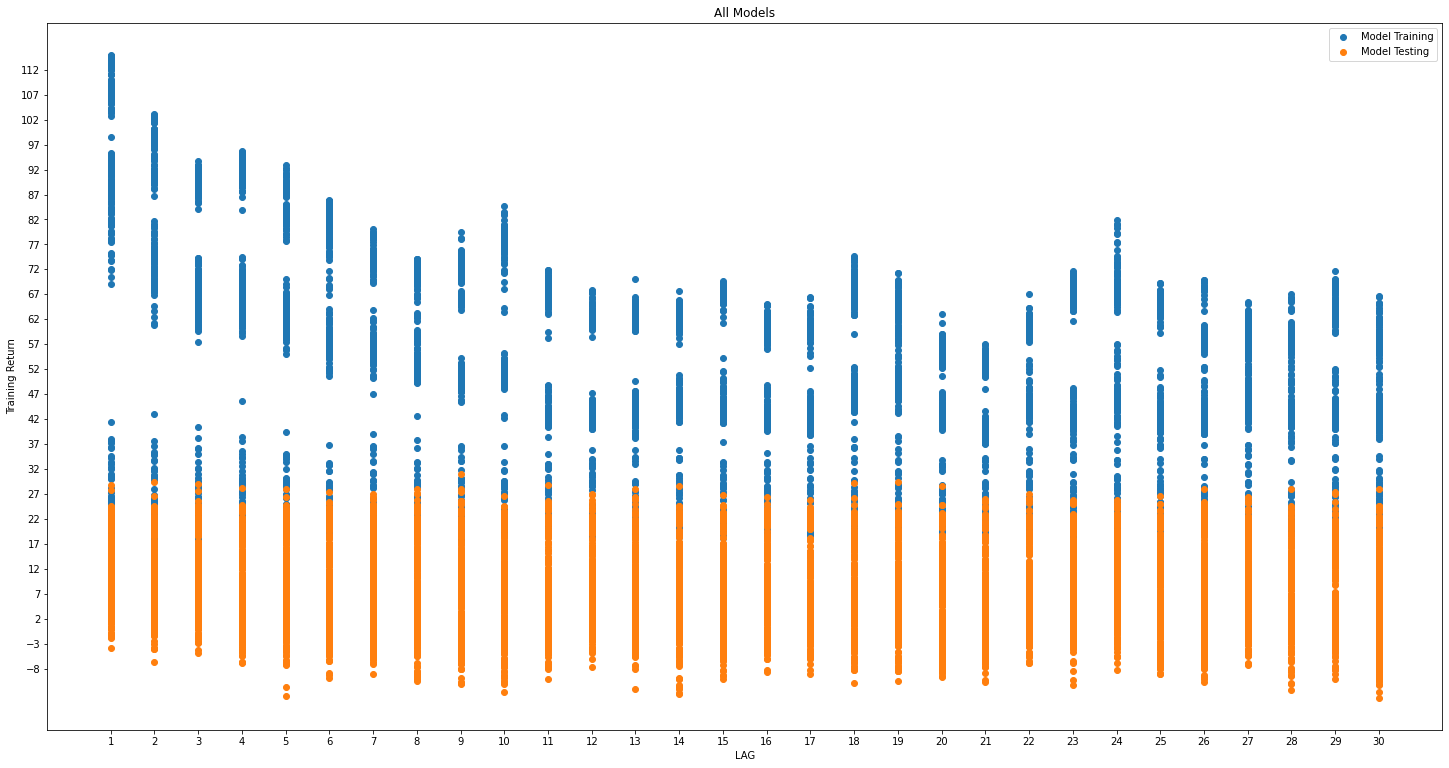

In [6]:
plt.figure(figsize=(25,13))
plt.xticks(np.arange(min(df_all['LAG']), max(df_all['LAG'])+1, 1))
plt.yticks(np.arange(-8, max(df_all['Training Return']), 5))
plt.scatter(df_all['LAG'],df_all['Training Return'], label="Model Training")
plt.scatter(df_all['LAG'],df_all['Testing Return'], label="Model Testing")
plt.xlabel('LAG')
plt.ylabel('Training Return')

plt.legend()
plt.title("All Models")
plt.show()

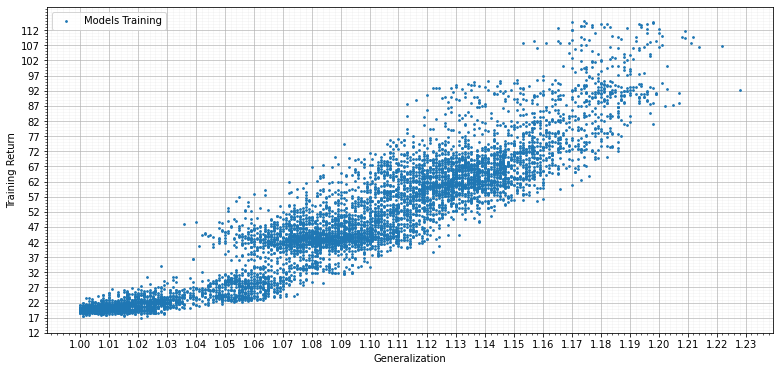

In [7]:
plt.figure(figsize=(13,6))
plt.xticks(np.arange(min(df_all['Generalization']), max(df_all['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all['Training Return'])+1, 5))
plt.scatter(df_all['Generalization'],df_all['Training Return'], label="Models Training", s=3, zorder = 2)

plt.xlabel('Generalization',)
plt.ylabel('Training Return')

plt.minorticks_on(); plt.grid(which='major', alpha = 0.8); plt.grid(which='minor', alpha = 0.1) 
plt.legend()
plt.savefig('img/AllModels.PNG', bbox_inches='tight', dpi=300)
plt.show()


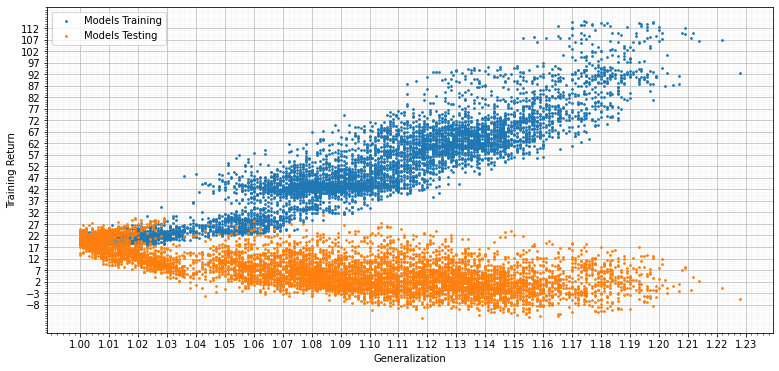

In [8]:
plt.figure(figsize=(13,6))
plt.xticks(np.arange(min(df_all['Generalization']), max(df_all['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all['Training Return'])+1, 5))
plt.scatter(df_all['Generalization'],df_all['Training Return'], label="Models Training", s=3, zorder = 2)
plt.scatter(df_all['Generalization'],df_all['Testing Return'], label="Models Testing", s=3, zorder = 2)
plt.xlabel('Generalization')
plt.ylabel('Training Return')

plt.legend()
plt.minorticks_on(); plt.grid(which='major', alpha = 0.8); plt.grid(which='minor', alpha = 0.1) 
plt.savefig('img/AllModels2.PNG', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
print("Training Ret: ",df_all['Training Return'].mean())
print("Testing Ret: ",df_all['Testing Return'].mean())
print("Training Acc: ",df_all['Training Accuracy'].mean())
print("Testing Acc: ",df_all['Testing Accuracy'].mean())

Training Ret:  46.84319727891157
Testing Ret:  7.345034013605442
Training Acc:  0.623534149659864
Testing Acc:  0.5383423129251701


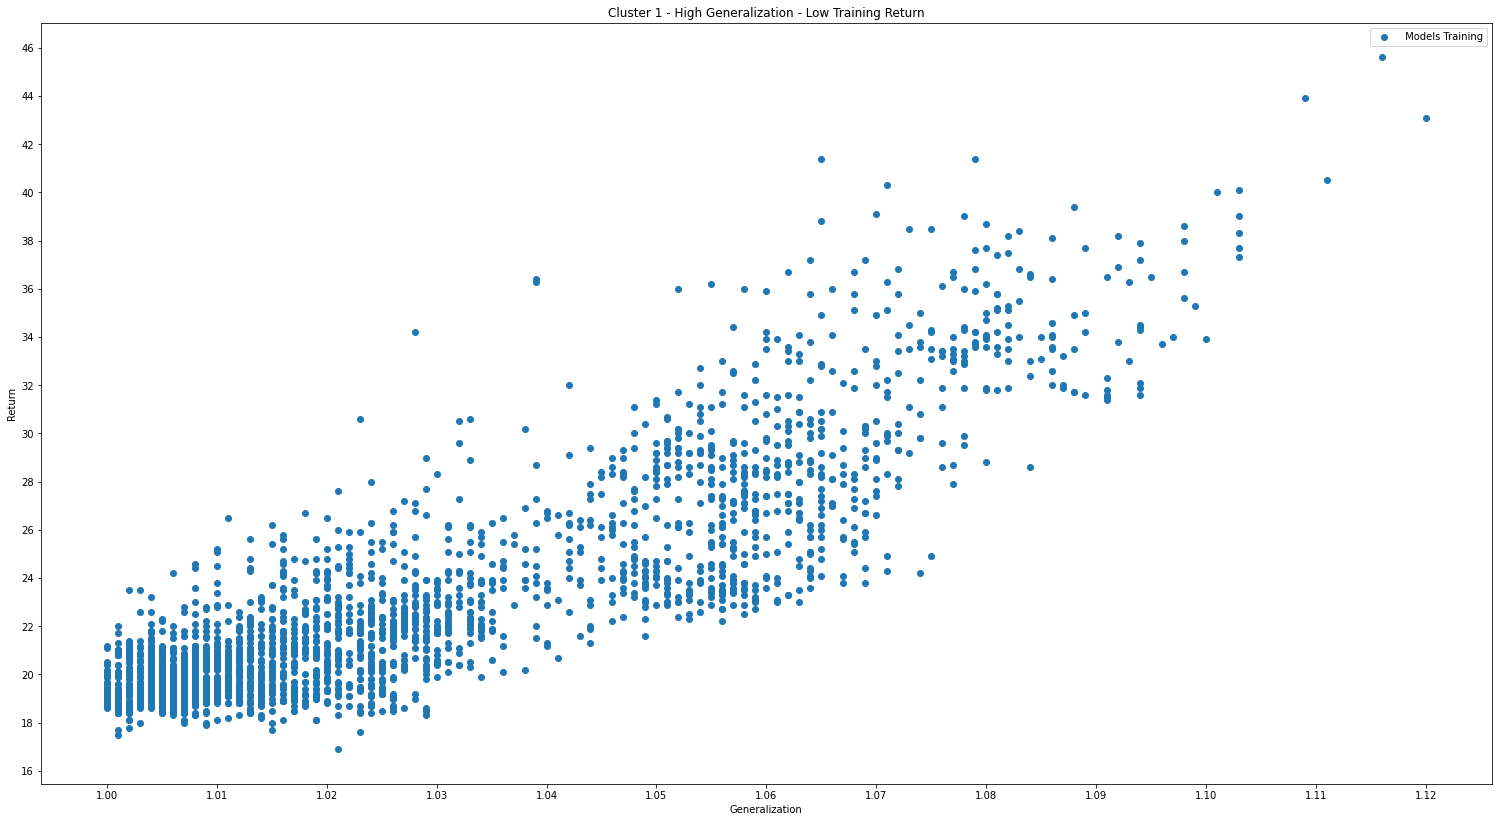

In [10]:
df_all_cluster1 = df_all[df_all['C'] == 0.1]

plt.figure(figsize=(26,14))
plt.xticks(np.arange(min(df_all_cluster1['Generalization']), max(df_all_cluster1['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all_cluster1['Training Return'])+1, 2))
plt.scatter(df_all_cluster1['Generalization'],df_all_cluster1['Training Return'], label=" Models Training")
plt.xlabel('Generalization')
plt.ylabel('Return')
plt.title("Cluster 1 - High Generalization - Low Training Return")
plt.legend()
plt.show()

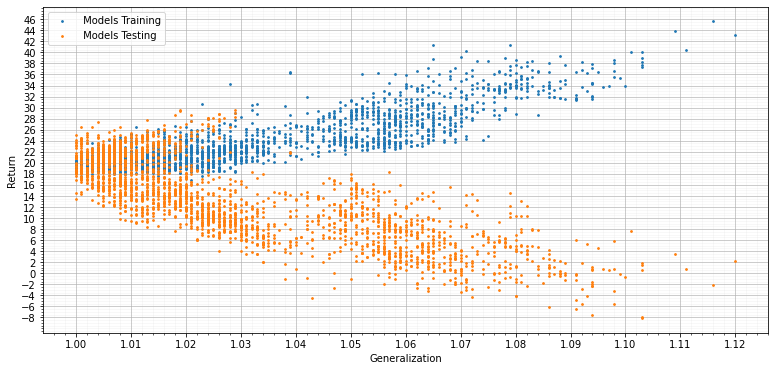

In [11]:
df_all_cluster1 = df_all[df_all['C'] == 0.1]

plt.figure(figsize=(13,6))
plt.xticks(np.arange(min(df_all_cluster1['Generalization']), max(df_all_cluster1['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all_cluster1['Training Return'])+1, 2))
plt.scatter(df_all_cluster1['Generalization'],df_all_cluster1['Training Return'], label=" Models Training", s=3, zorder = 2)
plt.scatter(df_all_cluster1['Generalization'],df_all_cluster1['Testing Return'], label=" Models Testing", s=3, zorder = 2)
plt.xlabel('Generalization')
plt.ylabel('Return')

plt.legend()
plt.minorticks_on(); plt.grid(which='major', alpha = 0.8); plt.grid(which='minor', alpha = 0.1) 
plt.savefig('img/Cluster1.PNG', bbox_inches='tight', dpi=300)
plt.show()

In [12]:
print("Training Ret: ",df_all_cluster1['Training Return'].mean())
print("Testing Ret: ",df_all_cluster1['Testing Return'].mean())
print("Training Acc: ",df_all_cluster1['Training Accuracy'].mean())
print("Testing Acc: ",df_all_cluster1['Testing Accuracy'].mean())

Training Ret:  23.105215686274512
Testing Ret:  13.684666666666667
Training Acc:  0.573095294117647
Testing Acc:  0.5489035294117647


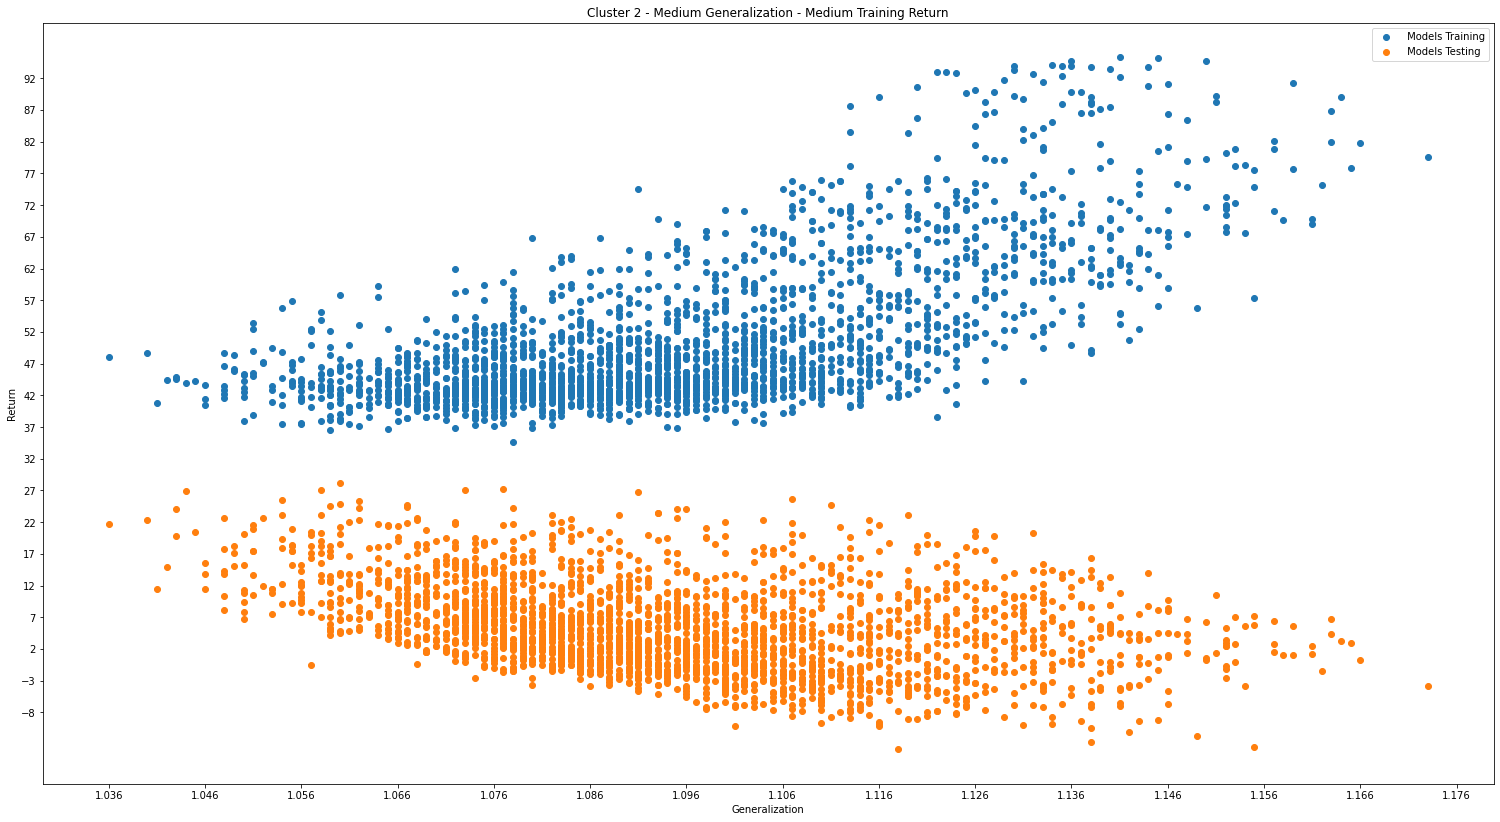

In [13]:
df_all_cluster2 = df_all[df_all['C'] == 0.5]

plt.figure(figsize=(26,14))
plt.xticks(np.arange(min(df_all_cluster2['Generalization']), max(df_all_cluster2['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all_cluster2['Training Return'])+1, 5))
plt.scatter(df_all_cluster2['Generalization'],df_all_cluster2['Training Return'], label=" Models Training")
plt.scatter(df_all_cluster2['Generalization'],df_all_cluster2['Testing Return'], label=" Models Testing")

plt.xlabel('Generalization')
plt.ylabel('Return')

plt.legend()
plt.title("Cluster 2 - Medium Generalization - Medium Training Return")
plt.show()

In [14]:
print("Training Ret: ",df_all_cluster2['Training Return'].mean())
print("Testing Ret: ",df_all_cluster2['Testing Return'].mean())
print("Training Acc: ",df_all_cluster2['Training Accuracy'].mean())
print("Testing Acc: ",df_all_cluster2['Testing Accuracy'].mean())

Training Ret:  50.28776470588236
Testing Ret:  5.371921568627451
Training Acc:  0.6323850980392156
Testing Acc:  0.5373435294117648


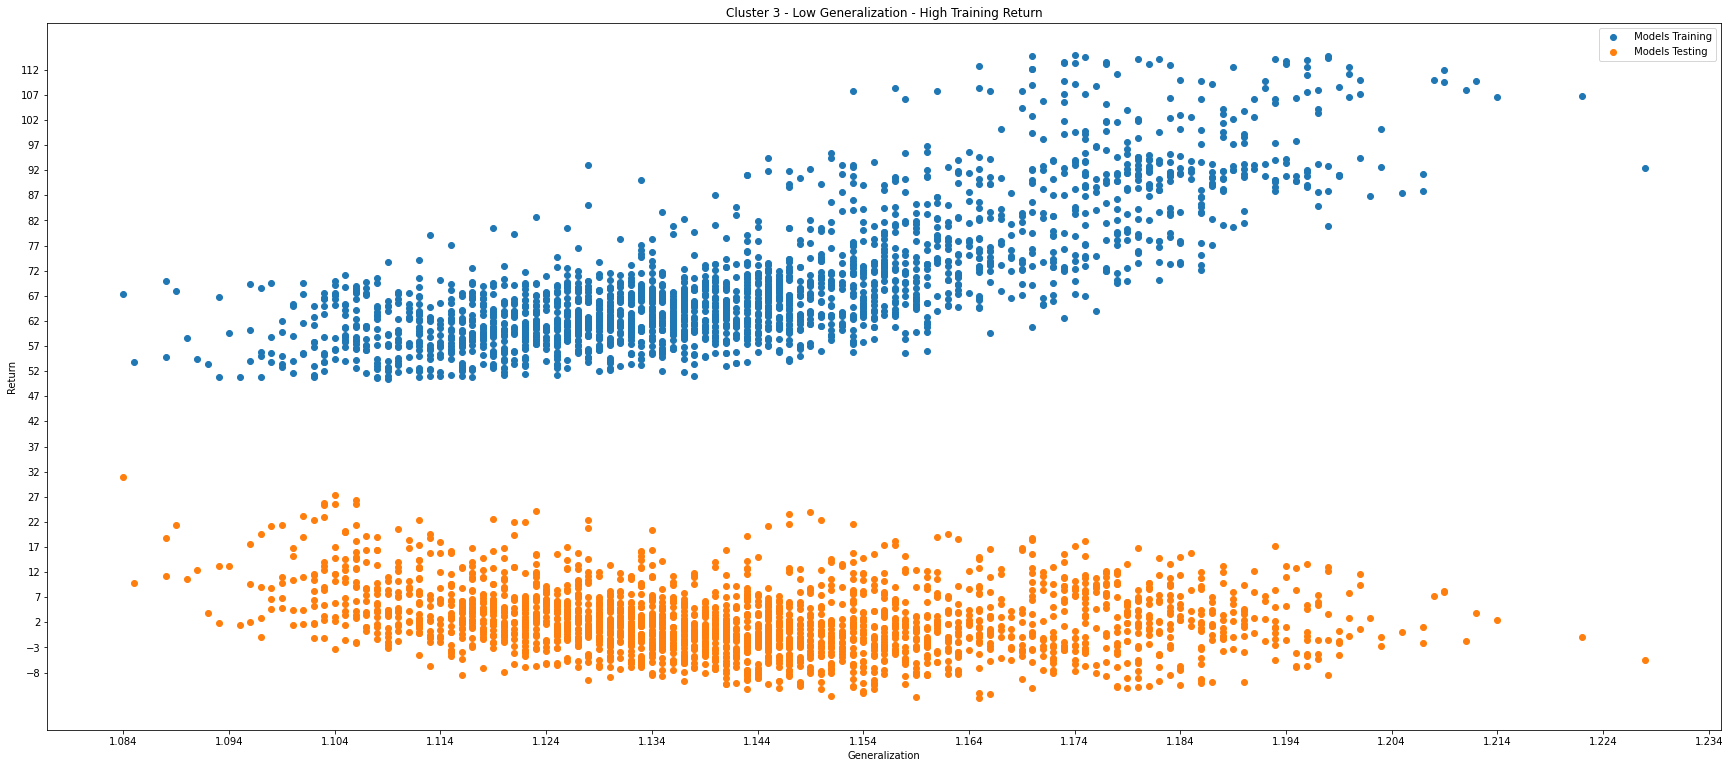

In [15]:
df_all_cluster3 = df_all[df_all['C'] == 1.0]

plt.figure(figsize=(30,13))
plt.xticks(np.arange(min(df_all_cluster3['Generalization']), max(df_all_cluster3['Generalization'])+0.1, 0.01))
plt.yticks(np.arange(-8, max(df_all_cluster3['Training Return'])+1, 5))
plt.scatter(df_all_cluster3['Generalization'],df_all_cluster3['Training Return'], label=" Models Training")
plt.scatter(df_all_cluster3['Generalization'],df_all_cluster3['Testing Return'], label=" Models Testing")

plt.xlabel('Generalization')
plt.ylabel('Return')

plt.legend()
plt.title("Cluster 3 - Low Generalization - High Training Return")
plt.show()

In [16]:
print("Training Ret: ",df_all_cluster3['Training Return'].mean())
print("Testing Ret: ",df_all_cluster3['Testing Return'].mean())
print("Training Acc: ",df_all_cluster3['Training Accuracy'].mean())
print("Testing Acc: ",df_all_cluster3['Testing Accuracy'].mean())

Training Ret:  69.8424
Testing Ret:  2.396311111111111
Training Acc:  0.6706671111111111
Testing Acc:  0.527504888888889


In [17]:
df_group = df_all_cluster1.groupby(by=['Train Days']).median()
df_group.reset_index(inplace=True)
df_group

,Train Days,LAG,C,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
0,30,15.5,0.1,10.0,0.6020,0.5220,34.20,4.85,1.0810
1,40,15.5,0.1,10.0,0.5880,0.5330,29.40,10.55,1.0555
2,50,15.5,0.1,10.0,0.5850,0.5220,28.75,5.00,1.0635
3,60,15.5,0.1,10.0,0.5780,0.5220,24.60,4.10,1.0555
4,70,15.5,0.1,10.0,0.5760,0.5280,24.10,6.80,1.0505
5,80,15.5,0.1,10.0,0.5680,0.5400,22.80,10.30,1.0280
6,90,15.5,0.1,10.0,0.5690,0.5420,21.90,9.75,1.0270
7,100,15.5,0.1,10.0,0.5680,0.5525,21.10,14.25,1.0180
8,120,15.5,0.1,10.0,0.5680,0.5490,21.55,12.80,1.0210
9,140,15.5,0.1,10.0,0.5670,0.5510,20.30,13.50,1.0170


In [18]:
df_group.sort_values(by=['Generalization'])

,Train Days,LAG,C,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
11,180,15.5,0.1,10.0,0.5650,0.5610,19.20,18.70,1.0040
16,400,15.5,0.1,10.0,0.5680,0.5730,20.10,21.10,1.0050
13,250,15.5,0.1,10.0,0.5660,0.5720,19.50,21.30,1.0060
12,200,15.5,0.1,10.0,0.5650,0.5590,19.40,15.05,1.0070
14,300,15.5,0.1,10.0,0.5660,0.5730,19.20,22.20,1.0070
10,160,15.5,0.1,10.0,0.5655,0.5540,19.70,18.70,1.0105
15,350,15.5,0.1,10.0,0.5670,0.5790,19.80,22.60,1.0110
9,140,15.5,0.1,10.0,0.5670,0.5510,20.30,13.50,1.0170
7,100,15.5,0.1,10.0,0.5680,0.5525,21.10,14.25,1.0180
8,120,15.5,0.1,10.0,0.5680,0.5490,21.55,12.80,1.0210


In [19]:
df_cluster1_best_gen = df_all_cluster1[df_all_cluster1['Train Days'] == 180]
df_cluster1_best_gen

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
1650,1,0.1,180,20,0.568,0.569,20.1,24.4,1.001
1651,2,0.1,180,20,0.568,0.564,20.2,23.5,1.004
1652,3,0.1,180,20,0.568,0.559,19.9,22.0,1.009
1653,4,0.1,180,20,0.562,0.561,17.5,18.8,1.001
1654,5,0.1,180,20,0.568,0.565,19.9,26.4,1.003
...,...,...,...,...,...,...,...,...,...
1795,26,0.1,180,1,0.565,0.562,19.3,19.6,1.003
1796,27,0.1,180,1,0.566,0.563,19.7,18.7,1.003
1797,28,0.1,180,1,0.565,0.565,19.1,21.1,1.000
1798,29,0.1,180,1,0.566,0.565,19.4,20.9,1.001


In [20]:
print("Training Ret: ",df_cluster1_best_gen['Training Return'].mean())
print("Testing Ret: ",df_cluster1_best_gen['Testing Return'].mean())
print("Training Acc: ",df_cluster1_best_gen['Training Accuracy'].mean())
print("Testing Acc: ",df_cluster1_best_gen['Testing Accuracy'].mean())

Training Ret:  19.506666666666668
Testing Ret:  18.635333333333335
Training Acc:  0.5653933333333332
Testing Acc:  0.5608066666666666


In [21]:
df_cluster1_best_gen.sort_values(by=['Generalization'])

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
1799,30,0.1,180,1,0.565,0.565,19.0,21.8,1.000
1674,25,0.1,180,20,0.568,0.568,20.0,25.0,1.000
1701,22,0.1,180,15,0.566,0.566,21.1,17.7,1.000
1774,5,0.1,180,1,0.564,0.564,18.9,24.1,1.000
1739,30,0.1,180,10,0.565,0.565,18.7,14.6,1.000
...,...,...,...,...,...,...,...,...,...
1692,13,0.1,180,15,0.564,0.550,20.5,10.4,1.014
1694,15,0.1,180,15,0.566,0.551,20.9,12.3,1.015
1660,11,0.1,180,20,0.569,0.553,20.1,13.9,1.016
1662,13,0.1,180,20,0.566,0.550,19.6,14.5,1.016


In [22]:
df_cluster1_best_gen.groupby(by=['Test Days']).mean()

,LAG,C,Train Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
Test Days,,,,,,,,
1,15.5,0.1,180.0,0.564733,0.564000,19.123333,22.513333,1.001333
5,15.5,0.1,180.0,0.565200,0.559233,18.940000,19.036667,1.006300
10,15.5,0.1,180.0,0.565100,0.561333,18.850000,16.853333,1.004300
15,15.5,0.1,180.0,0.565133,0.559033,20.866667,15.286667,1.006100
20,15.5,0.1,180.0,0.566800,0.560433,19.753333,19.486667,1.006767


In [23]:
df_cluster1_best_gen = df_cluster1_best_gen[df_cluster1_best_gen['Test Days'] == 1]
df_cluster1_best_gen

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
1770,1,0.1,180,1,0.565,0.566,19.3,24.5,1.001
1771,2,0.1,180,1,0.564,0.565,19.1,24.3,1.001
1772,3,0.1,180,1,0.564,0.565,18.9,24.2,1.001
1773,4,0.1,180,1,0.564,0.565,19.1,24.1,1.001
1774,5,0.1,180,1,0.564,0.564,18.9,24.1,1.000
1775,6,0.1,180,1,0.564,0.565,18.8,24.3,1.001
1776,7,0.1,180,1,0.564,0.565,18.9,24.5,1.001
1777,8,0.1,180,1,0.564,0.565,18.9,24.0,1.001
1778,9,0.1,180,1,0.564,0.563,18.9,23.4,1.001
1779,10,0.1,180,1,0.565,0.564,19.0,23.4,1.001


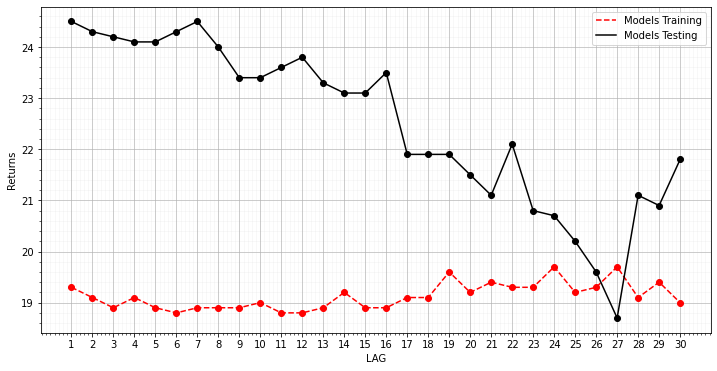

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(np.arange(min(df_cluster1_best_gen['LAG']), max(df_cluster1_best_gen['LAG'])+1, 1))
plt.yticks(np.arange(-8, max(df_cluster1_best_gen['Testing Return'])+1, 1))
plt.scatter(df_cluster1_best_gen['LAG'],df_cluster1_best_gen['Training Return'], c='r', zorder=2)
plt.scatter(df_cluster1_best_gen['LAG'],df_cluster1_best_gen['Testing Return'], c='k', zorder=2)
plt.plot(df_cluster1_best_gen['LAG'],df_cluster1_best_gen['Training Return'], 'r--', label = "Models Training", zorder=2)
plt.plot(df_cluster1_best_gen['LAG'],df_cluster1_best_gen['Testing Return'], 'k', label = "Models Testing", zorder=2)
plt.xlabel('LAG')
plt.ylabel('Returns')

plt.legend()
plt.minorticks_on(); plt.grid(which='major', alpha = 0.8); plt.grid(which='minor', alpha = 0.1) 
plt.savefig('img/Cluster1regularizacion.PNG', bbox_inches='tight', dpi=300)
plt.show()

In [25]:
print("Training Ret: ",df_cluster1_best_gen['Training Return'].mean())
print("Testing Ret: ",df_cluster1_best_gen['Testing Return'].mean())
print("Training Acc: ",df_cluster1_best_gen['Training Accuracy'].mean())
print("Testing Acc: ",df_cluster1_best_gen['Testing Accuracy'].mean())

Training Ret:  19.123333333333335
Testing Ret:  22.513333333333335
Training Acc:  0.5647333333333333
Testing Acc:  0.5640000000000001


In [26]:
#### Extrapolar informacion que nos entrega de C=1 y escoger lags menores a 12

In [27]:
df_cluster1_best_gen = df_cluster1_best_gen[df_cluster1_best_gen['LAG'] < 12]
df_cluster1_best_gen

,LAG,C,Train Days,Test Days,Training Accuracy,Testing Accuracy,Training Return,Testing Return,Generalization
1770,1,0.1,180,1,0.565,0.566,19.3,24.5,1.001
1771,2,0.1,180,1,0.564,0.565,19.1,24.3,1.001
1772,3,0.1,180,1,0.564,0.565,18.9,24.2,1.001
1773,4,0.1,180,1,0.564,0.565,19.1,24.1,1.001
1774,5,0.1,180,1,0.564,0.564,18.9,24.1,1.000
1775,6,0.1,180,1,0.564,0.565,18.8,24.3,1.001
1776,7,0.1,180,1,0.564,0.565,18.9,24.5,1.001
1777,8,0.1,180,1,0.564,0.565,18.9,24.0,1.001
1778,9,0.1,180,1,0.564,0.563,18.9,23.4,1.001
1779,10,0.1,180,1,0.565,0.564,19.0,23.4,1.001


In [28]:
print("Training Ret: ",df_cluster1_best_gen['Training Return'].mean())
print("Testing Ret: ",df_cluster1_best_gen['Testing Return'].mean())
print("Training Acc: ",df_cluster1_best_gen['Training Accuracy'].mean())
print("Testing Acc: ",df_cluster1_best_gen['Testing Accuracy'].mean())

Training Ret:  18.963636363636365
Testing Ret:  24.03636363636364
Training Acc:  0.5641818181818181
Testing Acc:  0.5647272727272727
